Define constants

In [1]:
from os import getcwd, path
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = getcwd()

# GLOVE_UTILS = path.join(BASE_PATH, 'glove_utils.py')
DATA_UTILS = path.join(BASE_PATH, 'data_utils.py')
CONV_MODEL = path.join(BASE_PATH, 'convnet/train.py')
MODEL_PATH = path.join(BASE_PATH, 'convnet/model/model.h5')
TRAIN_PATH = path.join(BASE_PATH, 'kc_data.json')

In [2]:
# exec(open(GLOVE_UTILS).read())
# print_top_similar('hello', count=10)
exec(open(DATA_UTILS).read())
exec(open(CONV_MODEL).read())

/home/2359media/miniconda3/envs/botbot-nlp/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Use functions from the utils to extract and preprocess the training data

In [3]:
from keras.utils import to_categorical

X_data, y_data = get_data_pairs(data_from_json(TRAIN_PATH))

classes = list(set(y_data))
num_classes = len(classes)

X_train = X_data
y_train = np.array([
    to_categorical(classes.index(item), num_classes=num_classes)
    for item in y_data
], dtype='float32')

Plot the training data

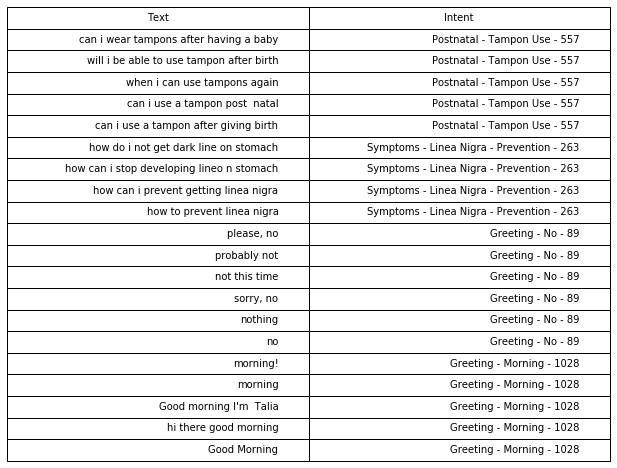

In [4]:
cell_text = [
    [item, y_data[idx] + ' - ' + str(np.argmax(y_train[idx]))] 
    for (idx, item) in enumerate(X_train)
]
plt.table(cellText=cell_text[:20],
          colLabels=['Text', 'Intent'],
          loc='center') \
   .scale(1.8,1.8)
plt.axis('off')
plt.show()

In [5]:
print('Number of samples: %s, classes: %s' % (len(X_train), num_classes))

Number of samples: 10256, classes: 1427


Train starting from a previous model if exists or start the training from scratch
- Use `non_static=False` to avoid adding the non-static channel (performance boost, sacrifices accuracy)
- Use `use_tqdm=False` to use Keras original stdout instead

In [6]:
train_model(X_train, y_train, classes=classes, model_path=MODEL_PATH) # disable non-static channel for faster training

Importing /home/2359media/botbot-nlp/data/glove/glove.6B.300d.pickle...
Tokenizer contains 20989 unique tokens
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512)          0                                            
__________________________________________________________________________________________________
static_embeddings (Embedding)   (None, 512, 300)     6297000     input_1[0][0]                    
__________________________________________________________________________________________________
non_static_embeddings (Embeddin (None, 512, 300)     6297000     input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 512, 46)      0                                           

HBox(children=(IntProgress(value=0, description='Training', max=500), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 1', max=10256), HTML(value='')))


Epoch 00002: loss improved from inf to 5.38155, saving model to /home/2359media/botbot-nlp/convnet/model/weights-02-5.3816.h5


HBox(children=(IntProgress(value=0, description='Epoch 2', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 3', max=10256), HTML(value='')))


Epoch 00004: loss improved from 5.38155 to 1.74932, saving model to /home/2359media/botbot-nlp/convnet/model/weights-04-1.7493.h5


HBox(children=(IntProgress(value=0, description='Epoch 4', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 5', max=10256), HTML(value='')))


Epoch 00006: loss improved from 1.74932 to 0.77775, saving model to /home/2359media/botbot-nlp/convnet/model/weights-06-0.7778.h5


HBox(children=(IntProgress(value=0, description='Epoch 6', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 7', max=10256), HTML(value='')))


Epoch 00008: loss improved from 0.77775 to 0.50038, saving model to /home/2359media/botbot-nlp/convnet/model/weights-08-0.5004.h5


HBox(children=(IntProgress(value=0, description='Epoch 8', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 9', max=10256), HTML(value='')))


Epoch 00010: loss improved from 0.50038 to 0.40046, saving model to /home/2359media/botbot-nlp/convnet/model/weights-10-0.4005.h5


HBox(children=(IntProgress(value=0, description='Epoch 10', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 11', max=10256), HTML(value='')))


Epoch 00012: loss improved from 0.40046 to 0.35202, saving model to /home/2359media/botbot-nlp/convnet/model/weights-12-0.3520.h5


HBox(children=(IntProgress(value=0, description='Epoch 12', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 13', max=10256), HTML(value='')))


Epoch 00014: loss improved from 0.35202 to 0.32032, saving model to /home/2359media/botbot-nlp/convnet/model/weights-14-0.3203.h5


HBox(children=(IntProgress(value=0, description='Epoch 14', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 15', max=10256), HTML(value='')))


Epoch 00016: loss improved from 0.32032 to 0.30897, saving model to /home/2359media/botbot-nlp/convnet/model/weights-16-0.3090.h5


HBox(children=(IntProgress(value=0, description='Epoch 16', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 17', max=10256), HTML(value='')))


Epoch 00018: loss improved from 0.30897 to 0.29628, saving model to /home/2359media/botbot-nlp/convnet/model/weights-18-0.2963.h5


HBox(children=(IntProgress(value=0, description='Epoch 18', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 19', max=10256), HTML(value='')))


Epoch 00020: loss improved from 0.29628 to 0.27653, saving model to /home/2359media/botbot-nlp/convnet/model/weights-20-0.2765.h5


HBox(children=(IntProgress(value=0, description='Epoch 20', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 21', max=10256), HTML(value='')))


Epoch 00022: loss improved from 0.27653 to 0.26593, saving model to /home/2359media/botbot-nlp/convnet/model/weights-22-0.2659.h5


HBox(children=(IntProgress(value=0, description='Epoch 22', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 23', max=10256), HTML(value='')))


Epoch 00024: loss improved from 0.26593 to 0.26412, saving model to /home/2359media/botbot-nlp/convnet/model/weights-24-0.2641.h5


HBox(children=(IntProgress(value=0, description='Epoch 24', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 25', max=10256), HTML(value='')))


Epoch 00026: loss improved from 0.26412 to 0.25748, saving model to /home/2359media/botbot-nlp/convnet/model/weights-26-0.2575.h5


HBox(children=(IntProgress(value=0, description='Epoch 26', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 27', max=10256), HTML(value='')))


Epoch 00028: loss improved from 0.25748 to 0.24036, saving model to /home/2359media/botbot-nlp/convnet/model/weights-28-0.2404.h5


HBox(children=(IntProgress(value=0, description='Epoch 28', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 29', max=10256), HTML(value='')))


Epoch 00030: loss improved from 0.24036 to 0.23633, saving model to /home/2359media/botbot-nlp/convnet/model/weights-30-0.2363.h5


HBox(children=(IntProgress(value=0, description='Epoch 30', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 31', max=10256), HTML(value='')))


Epoch 00032: loss improved from 0.23633 to 0.23329, saving model to /home/2359media/botbot-nlp/convnet/model/weights-32-0.2333.h5


HBox(children=(IntProgress(value=0, description='Epoch 32', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 33', max=10256), HTML(value='')))


Epoch 00034: loss improved from 0.23329 to 0.22813, saving model to /home/2359media/botbot-nlp/convnet/model/weights-34-0.2281.h5


HBox(children=(IntProgress(value=0, description='Epoch 34', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 35', max=10256), HTML(value='')))


Epoch 00036: loss did not improve


HBox(children=(IntProgress(value=0, description='Epoch 36', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 37', max=10256), HTML(value='')))


Epoch 00038: loss did not improve


HBox(children=(IntProgress(value=0, description='Epoch 38', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 39', max=10256), HTML(value='')))


Epoch 00040: loss improved from 0.22813 to 0.21269, saving model to /home/2359media/botbot-nlp/convnet/model/weights-40-0.2127.h5


HBox(children=(IntProgress(value=0, description='Epoch 40', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 41', max=10256), HTML(value='')))


Epoch 00042: loss did not improve


HBox(children=(IntProgress(value=0, description='Epoch 42', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 43', max=10256), HTML(value='')))


Epoch 00044: loss did not improve


HBox(children=(IntProgress(value=0, description='Epoch 44', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 45', max=10256), HTML(value='')))


Epoch 00046: loss improved from 0.21269 to 0.21143, saving model to /home/2359media/botbot-nlp/convnet/model/weights-46-0.2114.h5


HBox(children=(IntProgress(value=0, description='Epoch 46', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 47', max=10256), HTML(value='')))


Epoch 00048: loss did not improve


HBox(children=(IntProgress(value=0, description='Epoch 48', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 49', max=10256), HTML(value='')))


Epoch 00050: loss improved from 0.21143 to 0.20774, saving model to /home/2359media/botbot-nlp/convnet/model/weights-50-0.2077.h5


HBox(children=(IntProgress(value=0, description='Epoch 50', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 51', max=10256), HTML(value='')))


Epoch 00052: loss did not improve


HBox(children=(IntProgress(value=0, description='Epoch 52', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 53', max=10256), HTML(value='')))


Epoch 00054: loss improved from 0.20774 to 0.20395, saving model to /home/2359media/botbot-nlp/convnet/model/weights-54-0.2040.h5
Epoch 00054: early stopping

